<a href="https://colab.research.google.com/github/CesarAF10/Simulaci-n-I/blob/main/Aceptacion_y_rechazo_distribucion_triangular.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

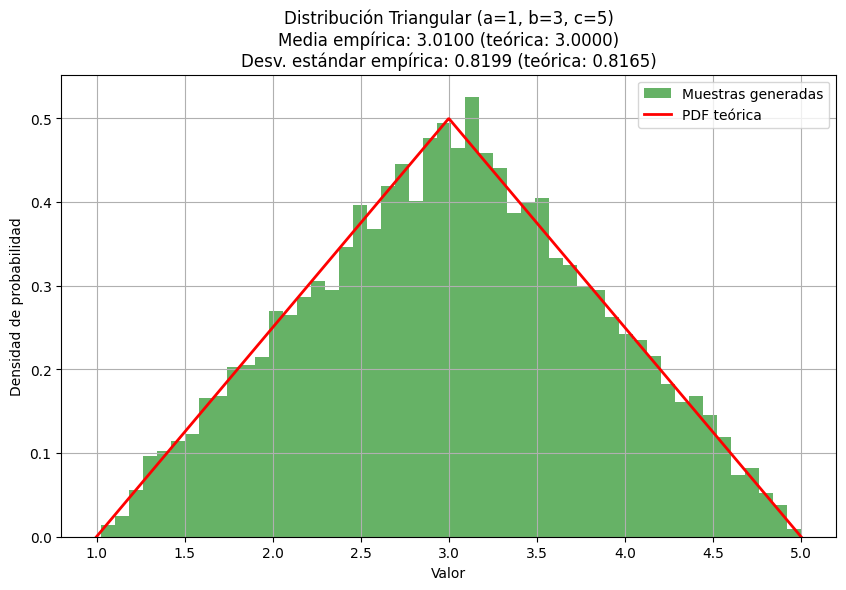

Resultados:
- Media empírica: 3.0100
- Media teórica: 3.0000
- Desviación estándar empírica: 0.8199
- Desviación estándar teórica: 0.8165


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import triang

# Parámetros de la distribución triangular
a = 1  # límite inferior
b = 3  # moda
c = 5  # límite superior

# Función de densidad de probabilidad teórica
def triangular_pdf(x, a, b, c):
    cond1 = (a <= x) & (x < b)
    cond2 = (b <= x) & (x <= c)
    out = np.zeros_like(x, dtype=float)
    out[cond1] = 2 * (x[cond1] - a) / ((c - a) * (b - a))
    out[cond2] = 2 * (c - x[cond2]) / ((c - a) * (c - b))
    return out

# Método de aceptación y rechazo para generar la distribución triangular
def aceptacion_rechazo_triangular(a, b, c, n_samples):
    samples = []
    k = 2 / (c - a)  # altura máxima de la PDF

    while len(samples) < n_samples:
        # Generar muestra uniforme en [a, c]
        x = np.random.uniform(a, c)
        # Generar uniforme en [0, k] para comparación
        y = np.random.uniform(0, k)

        # Evaluar la PDF en x
        if x < b:
            fx = 2 * (x - a) / ((c - a) * (b - a))
        else:
            fx = 2 * (c - x) / ((c - a) * (c - b))

        # Criterio de aceptación
        if y <= fx:
            samples.append(x)

    return np.array(samples)

# Generar muestras
n_samples = 10000
samples = aceptacion_rechazo_triangular(a, b, c, n_samples)

# Calcular media y desviación estándar empíricas
media_empirica = np.mean(samples)
std_empirica = np.std(samples)

# Calcular media y desviación estándar teóricas
media_teorica = (a + b + c) / 3
varianza_teorica = (a**2 + b**2 + c**2 - a*b - a*c - b*c) / 18
std_teorica = np.sqrt(varianza_teorica)

# Crear histograma
plt.figure(figsize=(10, 6))
plt.hist(samples, bins=50, density=True, alpha=0.6, color='g', label='Muestras generadas')

# Graficar PDF teórica
x = np.linspace(a, c, 1000)
plt.plot(x, triangular_pdf(x, a, b, c), 'r-', lw=2, label='PDF teórica')

# Añadir información estadística
plt.title(f'Distribución Triangular (a={a}, b={b}, c={c})\n'
          f'Media empírica: {media_empirica:.4f} (teórica: {media_teorica:.4f})\n'
          f'Desv. estándar empírica: {std_empirica:.4f} (teórica: {std_teorica:.4f})')
plt.xlabel('Valor')
plt.ylabel('Densidad de probabilidad')
plt.legend()
plt.grid(True)
plt.show()

# Mostrar resultados numéricos
print("Resultados:")
print(f"- Media empírica: {media_empirica:.4f}")
print(f"- Media teórica: {media_teorica:.4f}")
print(f"- Desviación estándar empírica: {std_empirica:.4f}")
print(f"- Desviación estándar teórica: {std_teorica:.4f}")